In [40]:
from rouge_score import rouge_scorer, scoring
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

In [17]:
import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer, scoring
from tqdm import tqdm
# Baixar dados do nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/mariochiaparini/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
# Função para calcular o ROUGE Score
def calculate_rouge(reference, candidate):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference, candidate)
    return scores

In [6]:
def calculate_bleu(reference, candidate):
    reference = [nltk.word_tokenize(reference.lower())]
    candidate = nltk.word_tokenize(candidate.lower())
    smoothing_function = SmoothingFunction().method4
    score = sentence_bleu(reference, candidate, smoothing_function=smoothing_function)
    return score

In [7]:
# Exemplo de textos
text1 = """This is a song by Bob Dylan. It goes like this:

Dreams of llamas, queens and the like
I'm still on the road, headed for the sky
Dreams of llamas, queens and the like
I'm still on the road, headed for the sky"""

ground_truth = """Twas a dark day in Dallas, November 63
A day that will live on in infamy
President Kennedy was a-ridin high
Good day to be livin and a good day to die
Being led to the slaughter like a sacrificial lamb
He said, Wait a minute, boys, you know who I am?
Of course we do, we know who you are
Then they blew off his head while he was still in the car"""

In [8]:
rouge_scores = calculate_rouge(ground_truth, text1)
print(f"ROUGE Score for text1: {rouge_scores}")

ROUGE Score for text1: {'rouge1': Score(precision=0.2222222222222222, recall=0.13333333333333333, fmeasure=0.16666666666666669), 'rouge2': Score(precision=0.0, recall=0.0, fmeasure=0.0), 'rougeL': Score(precision=0.17777777777777778, recall=0.10666666666666667, fmeasure=0.13333333333333336)}


In [80]:
# Load the dataset
df = pd.read_csv('../NLP/Data/lyrics-data.csv')

In [81]:
df = df[df['language'] == 'pt']

In [82]:
df

,ALink,SName,SLink,Lyric,language
0,/ivete-sangalo/,Arerê,/ivete-sangalo/arere.html,"Tudo o que eu quero nessa vida,\nToda vida, é\...",pt
1,/ivete-sangalo/,Se Eu Não Te Amasse Tanto Assim,/ivete-sangalo/se-eu-nao-te-amasse-tanto-assim...,Meu coração\nSem direção\nVoando só por voar\n...,pt
2,/ivete-sangalo/,Céu da Boca,/ivete-sangalo/chupa-toda.html,É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...,pt
3,/ivete-sangalo/,Quando A Chuva Passar,/ivete-sangalo/quando-a-chuva-passar.html,Quando a chuva passar\n\nPra quê falar\nSe voc...,pt
4,/ivete-sangalo/,Sorte Grande,/ivete-sangalo/sorte-grande.html,A minha sorte grande foi você cair do céu\nMin...,pt
...,...,...,...,...,...
379626,/xama-gideon-dos-lakotas/,Hino 96 - a Chave de Ser,/xama-gideon-dos-lakotas/hino-96-a-chave-de-se...,Esclarecimentos Maiores\nEntrego agora a chave...,pt
379627,/xama-gideon-dos-lakotas/,Hino 97 - Invocação,/xama-gideon-dos-lakotas/hino-97-invocacao.html,Invocação Eu Sou\nEu Sou a presença Divina Eu ...,pt
379628,/xama-gideon-dos-lakotas/,Hino 98 - Conhecimentos,/xama-gideon-dos-lakotas/hino-98-conhecimentos...,Aqui na fazenda ensinamos a você todo conhecim...,pt
379792,/miriam-makeba/,Chove Chuva,/miriam-makeba/chove-chuva.html,Chove chuva\nChove sem parar\nChove chuva\nCho...,pt


In [83]:
selected_rows = df.sample(n=2)  # Selecionar aleatoriamente 2 linhas para demonstração

In [84]:
selected_rows

,ALink,SName,SLink,Lyric,language
316445,/ira/,Alegria de Viver,/ira/alegria-de-viver.html,O inferno de sua glória\nA passar por mim\nEu ...,pt
351960,/trio-parada-dura/,Minhas Queixas,/trio-parada-dura/minhas-queixas.html,Estou voltando novamente à minha terra\nPara r...,pt


In [85]:
df['Generated_EN'] = """Take a sad song, and make it better
 nobody wants to cry no more

Take a broken heart, heal it with love
send out the pain, send out all the tears
take a hurt that's been dealt
and make the scars disappear
no more tears, no pain
you'll be happy again
wash away the hurt
heal the heart
it'd be a new day
from now on
let't go
get over it
mend the broken pieces
find your smile again,
your heart will heel
the light will shine through
bright and new
tears gone
hurt gone too
smile back at me
as we dance
hand in hand
up above
we're on our way
to a brighter day.
I don'tsay goodbye
cause I know
We'lalways be here
when you'reready
(chorus)
No more tear,s no morelife
tell me how it'ssupposed to be
there'sa song for every heartache
that'sthe way it goes
Somebody woke up thinking about you
somebody else is praying for you too. (Bridge) And I will be your friend
in this world that can be hard on us
but I'm here to help you see
love is out there
its waiting for us.Take all your sad days
turn them into joy
sing it out to the sky
watch your heart glow
You've been through the fire
But you are not tired
Don'tworry about the past
just let your spirit last
Cause we all gotta go 
through a storm someday
so we'can learn how to pray
So let's move forward
through the good days and the bad
And know that we will make
a better place for all
The world may be crazy
It may seem so mad
Just hold on to your faith
Keep on singing
this sadness away
There's nothing you can't handle
That love can hhandle better.Tears
are the rain that comes after the storm
Bringing life to everything
Everything'spositive
Today's improvement
Tomorrow's even"""

In [86]:
df['Llama3_EN'] = """
Write a song that starts with the following line and continues in a heartfelt, uplifting manner: 'Take a sad song, and make it better.' The song should include themes of hope, healing, and love. Make sure it captures the emotions and provides a sense of comfort and inspiration.

'Take this sadness, it's been weighing me down for so long,
I thought it would last forever, but now I see the light at the end of the song.'
This line sets the tone for the rest of your song. The chorus could be something like 
'I'm gonna take this sorrow, turn it into joy, with every step I take, I'll rise above the noise.' T
his song could have a gentle, soothing melody with acoustic guitar and a soft string section. It could also feature heartening lyrics, 
such as 'You're never alone in your struggles, there'sa hand that'sthere to hold, you've got this, don't give up the fight."""

### Generated

In [15]:
# Inicializar variáveis para armazenar as somas dos scores
total_bleu = 0
total_rouge1 = 0
total_rouge2 = 0
total_rougeL = 0
num_samples = len(df)

In [16]:
for index, row in tqdm(df.iterrows(), total=num_samples):
    reference = row['Lyric']
    candidate = row['Generated_EN']
    
    # Calcular BLEU Score
    bleu_score = calculate_bleu(reference, candidate)
    total_bleu += bleu_score
    
    # Calcular ROUGE Score
    rouge_scores = calculate_rouge(reference, candidate)
    total_rouge1 += rouge_scores['rouge1'].fmeasure
    total_rouge2 += rouge_scores['rouge2'].fmeasure
    total_rougeL += rouge_scores['rougeL'].fmeasure

100%|███████████████████████████████████████████████████████████████████████████| 191814/191814 [45:03<00:00, 70.94it/s]


In [17]:
avg_bleu = total_bleu / num_samples
avg_rouge1 = total_rouge1 / num_samples
avg_rouge2 = total_rouge2 / num_samples
avg_rougeL = total_rougeL / num_samples

In [18]:
print(f"Average BLEU Score: {avg_bleu}")
print(f"Average ROUGE-1 Score: {avg_rouge1}")
print(f"Average ROUGE-2 Score: {avg_rouge2}")
print(f"Average ROUGE-L Score: {avg_rougeL}")

Average BLEU Score: 0.0083973505823835
Average ROUGE-1 Score: 0.2595016713104107
Average ROUGE-2 Score: 0.022638123332043812
Average ROUGE-L Score: 0.11290306569380387


## Llama 3

In [16]:
# Inicializar variáveis para armazenar as somas dos scores
total_bleu = 0
total_rouge1 = 0
total_rouge2 = 0
total_rougeL = 0
num_samples = len(df)

In [17]:
for index, row in tqdm(df.iterrows(), total=num_samples):
    reference = row['Lyric']
    candidate = row['Llama3_EN']
    
    # Calcular BLEU Score
    bleu_score = calculate_bleu(reference, candidate)
    total_bleu += bleu_score
    
    # Calcular ROUGE Score
    rouge_scores = calculate_rouge(reference, candidate)
    total_rouge1 += rouge_scores['rouge1'].fmeasure
    total_rouge2 += rouge_scores['rouge2'].fmeasure
    total_rougeL += rouge_scores['rougeL'].fmeasure

100%|██████████████████████████████████████████████████████████████████████████| 191814/191814 [25:59<00:00, 122.97it/s]


In [18]:
avg_bleu = total_bleu / num_samples
avg_rouge1 = total_rouge1 / num_samples
avg_rouge2 = total_rouge2 / num_samples
avg_rougeL = total_rougeL / num_samples

In [19]:
print(f"Average BLEU Score: {avg_bleu}")
print(f"Average ROUGE-1 Score: {avg_rouge1}")
print(f"Average ROUGE-2 Score: {avg_rouge2}")
print(f"Average ROUGE-L Score: {avg_rougeL}")

Average BLEU Score: 0.00932827794392568
Average ROUGE-1 Score: 0.22162172624431756
Average ROUGE-2 Score: 0.020419547659721225
Average ROUGE-L Score: 0.1131479399194745


### Portuguese Gen vs Portuguese LLaMA3

In [18]:
df = pd.read_csv('../NLP/Data/lyrics-data.csv')

In [91]:
df = df[df['language'] == 'pt']

In [92]:
df['Generated_PT'] = """

Ela partiu Partiu e nunca mais voltou
Eu sei que você não quer mais ouvir

Aquela noite do acaso
Quando te encontramos na rua
Foi como se o destino
Viera tentar nos unir
O nosso amor
Não durou muito tempo
Mas nesse instante
Tive a certeza de que o amor é real
Pra voceu era um sonho
Que vocerê se esquecera
Percebendo que eu era sua
Seu amor pra sempre
Desse amor que esqueceu
Esse que foi meu sonhos
Só o tempo pode dizer
Coração que já não tem mão
Meu bem-querido, meus olhos de amor,
Como eu tô ficando sem vocé
Na vida de um coração
Sem vocá, sem coragem
Um coraçao que quebra
Bem mais um
Dando mais uma vez
No peito que é meio vazio
Lá e ninguém me entende
É como um canto vago
Do grito que não acaba
De vontade pra se entender
Já esse grita não dá
Agora o que diz?
Ô ô Ô
Amor, amor...
(Refrão)
...Ela partio, partida, ela partia, parte... (5x) (2x Refrões) 
Chuva de lágrimas desce, desci, vem me beber
Rio de paixão de amor
Chega, chega... vai chegar
Leva tudo e vamo embora
Procure o caminho... procure... ê procurar
Então... então, é entendo... é, entendendo
Beija, beija... beijar... o corazo
ô, ôtô...ô
Morre de dor, morre, o meui morreu... morri
Grito, gritei... gritou, gritei
Hoje não mais, hoje nem mais
Tomou o sol, tomou a chuça
Ah... a gente escreve
"""

In [21]:
total_bleu = 0
total_rouge1 = 0
total_rouge2 = 0
total_rougeL = 0
num_samples = len(df)

In [22]:
for index, row in tqdm(df.iterrows(), total=num_samples):
    reference = row['Lyric']
    candidate = row['Generated_PT']
    
    # Calcular BLEU Score
    bleu_score = calculate_bleu(reference, candidate)
    total_bleu += bleu_score
    
    # Calcular ROUGE Score
    rouge_scores = calculate_rouge(reference, candidate)
    total_rouge1 += rouge_scores['rouge1'].fmeasure
    total_rouge2 += rouge_scores['rouge2'].fmeasure
    total_rougeL += rouge_scores['rougeL'].fmeasure

100%|██████████████████████████████████████████████████████████████████████████| 157393/157393 [20:46<00:00, 126.28it/s]


In [23]:
avg_bleu = total_bleu / num_samples
avg_rouge1 = total_rouge1 / num_samples
avg_rouge2 = total_rouge2 / num_samples
avg_rougeL = total_rougeL / num_samples

In [24]:
print(f"Average BLEU Score: {avg_bleu}")
print(f"Average ROUGE-1 Score: {avg_rouge1}")
print(f"Average ROUGE-2 Score: {avg_rouge2}")
print(f"Average ROUGE-L Score: {avg_rougeL}")

Average BLEU Score: 0.008202515693165668
Average ROUGE-1 Score: 0.24726994844059183
Average ROUGE-2 Score: 0.03484296880212574
Average ROUGE-L Score: 0.12621023422167327


### LLaMA - Portuguese

In [93]:
df['LLaMA_PT'] = """ 

Write a lyric in portuguese
Title: Ela partiu Partiu e nunca 
mais voltou

Aqui vimonia e chorar minha saudadeEla partio, e eu fui sozinhoDei-lhe um abraço, 
mas não pude evitarLágrimas que vou deixar cairA Dor que vai consumir o meu coraçãoEu sei que ela venceu, 
eu perdi,E mas eu acho que eu poderia terBeen there, held her hand, and kissed her goodbyeA man can dream, 
can't he?But I know she's gone, 
for goodNow I'm all alone to cry for herAgua de beber e canções de saiaClaridade 
é o que você procura, é?She'll always be in my heart, she won'T be gone(ELA PARTIDOU)Note: 
This is a very emotional and sad song, it' s about the feeling of loss and longing for someone who left and never came 
back, It' a song that speaks about how hard it is to accept the loss of someone you love, but also the strength and beauty of 
the memories you shared together. EinzelnNote how the lyrics speak about a love that was there and now it 's just memorieS and the pain of 
losing someone so close. It ' a beautiful and heartbreaking song. Ela parteiuPartiu and I 'll never see her smile againNever again will I hear her 
laughEshe went away and didn'treturnAnd I was left behind aloneTo cry and yearn for what'she used to beAman can wish, perhaps,For her to
come back homeBut she left me with mem'ries of her loveI'd give anything to turn back timeWhen she was here by my sideHer presence lit up 
the nightShe left, the flame of our love went outNow nights are dark and endless without herI search for water and songs of escapeI yearned 
for light and peaceBut what I seek is so hard to findShe ' ll always live in me heartBut gone is she, forevermoreNote the use of 
repetition of "partiu" in the first and third stanzas, to emphasize the distance and separation between the speaker and his beloved. The second st
"""

In [26]:
total_bleu = 0
total_rouge1 = 0
total_rouge2 = 0
total_rougeL = 0
num_samples = len(df)

In [27]:
for index, row in tqdm(df.iterrows(), total=num_samples):
    reference = row['Lyric']
    candidate = row['LLaMA_PT']
    bleu_score = calculate_bleu(reference, candidate)
    total_bleu += bleu_score

    rouge_scores = calculate_rouge(reference, candidate)
    total_rouge1 += rouge_scores['rouge1'].fmeasure
    total_rouge2 += rouge_scores['rouge2'].fmeasure
    total_rougeL += rouge_scores['rougeL'].fmeasure

100%|███████████████████████████████████████████████████████████████████████████| 157393/157393 [27:47<00:00, 94.41it/s]


In [28]:
avg_bleu = total_bleu / num_samples
avg_rouge1 = total_rouge1 / num_samples
avg_rouge2 = total_rouge2 / num_samples
avg_rougeL = total_rougeL / num_samples

In [29]:
print(f"Average BLEU Score: {avg_bleu}")
print(f"Average ROUGE-1 Score: {avg_rouge1}")
print(f"Average ROUGE-2 Score: {avg_rouge2}")
print(f"Average ROUGE-L Score: {avg_rougeL}")

Average BLEU Score: 0.004479564293346815
Average ROUGE-1 Score: 0.10472026370262293
Average ROUGE-2 Score: 0.009681015971916507
Average ROUGE-L Score: 0.05894584641091562


In [94]:
df

,ALink,SName,SLink,Lyric,language,Generated_EN,Llama3_EN,Generated_PT,LLaMA_PT
0,/ivete-sangalo/,Arerê,/ivete-sangalo/arere.html,"Tudo o que eu quero nessa vida,\nToda vida, é\...",pt,"Take a sad song, and make it better\n nobody w...",\nWrite a song that starts with the following ...,\n\nEla partiu Partiu e nunca mais voltou\nEu ...,\n\nWrite a lyric in portuguese\nTitle: Ela p...
1,/ivete-sangalo/,Se Eu Não Te Amasse Tanto Assim,/ivete-sangalo/se-eu-nao-te-amasse-tanto-assim...,Meu coração\nSem direção\nVoando só por voar\n...,pt,"Take a sad song, and make it better\n nobody w...",\nWrite a song that starts with the following ...,\n\nEla partiu Partiu e nunca mais voltou\nEu ...,\n\nWrite a lyric in portuguese\nTitle: Ela p...
2,/ivete-sangalo/,Céu da Boca,/ivete-sangalo/chupa-toda.html,É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...,pt,"Take a sad song, and make it better\n nobody w...",\nWrite a song that starts with the following ...,\n\nEla partiu Partiu e nunca mais voltou\nEu ...,\n\nWrite a lyric in portuguese\nTitle: Ela p...
3,/ivete-sangalo/,Quando A Chuva Passar,/ivete-sangalo/quando-a-chuva-passar.html,Quando a chuva passar\n\nPra quê falar\nSe voc...,pt,"Take a sad song, and make it better\n nobody w...",\nWrite a song that starts with the following ...,\n\nEla partiu Partiu e nunca mais voltou\nEu ...,\n\nWrite a lyric in portuguese\nTitle: Ela p...
4,/ivete-sangalo/,Sorte Grande,/ivete-sangalo/sorte-grande.html,A minha sorte grande foi você cair do céu\nMin...,pt,"Take a sad song, and make it better\n nobody w...",\nWrite a song that starts with the following ...,\n\nEla partiu Partiu e nunca mais voltou\nEu ...,\n\nWrite a lyric in portuguese\nTitle: Ela p...
...,...,...,...,...,...,...,...,...,...
379626,/xama-gideon-dos-lakotas/,Hino 96 - a Chave de Ser,/xama-gideon-dos-lakotas/hino-96-a-chave-de-se...,Esclarecimentos Maiores\nEntrego agora a chave...,pt,"Take a sad song, and make it better\n nobody w...",\nWrite a song that starts with the following ...,\n\nEla partiu Partiu e nunca mais voltou\nEu ...,\n\nWrite a lyric in portuguese\nTitle: Ela p...
379627,/xama-gideon-dos-lakotas/,Hino 97 - Invocação,/xama-gideon-dos-lakotas/hino-97-invocacao.html,Invocação Eu Sou\nEu Sou a presença Divina Eu ...,pt,"Take a sad song, and make it better\n nobody w...",\nWrite a song that starts with the following ...,\n\nEla partiu Partiu e nunca mais voltou\nEu ...,\n\nWrite a lyric in portuguese\nTitle: Ela p...
379628,/xama-gideon-dos-lakotas/,Hino 98 - Conhecimentos,/xama-gideon-dos-lakotas/hino-98-conhecimentos...,Aqui na fazenda ensinamos a você todo conhecim...,pt,"Take a sad song, and make it better\n nobody w...",\nWrite a song that starts with the following ...,\n\nEla partiu Partiu e nunca mais voltou\nEu ...,\n\nWrite a lyric in portuguese\nTitle: Ela p...
379792,/miriam-makeba/,Chove Chuva,/miriam-makeba/chove-chuva.html,Chove chuva\nChove sem parar\nChove chuva\nCho...,pt,"Take a sad song, and make it better\n nobody w...",\nWrite a song that starts with the following ...,\n\nEla partiu Partiu e nunca mais voltou\nEu ...,\n\nWrite a lyric in portuguese\nTitle: Ela p...


In [95]:
def calculate_similarity(reference_texts, generated_texts):
    vectorizer = TfidfVectorizer().fit_transform(reference_texts + generated_texts)
    vectors = vectorizer.toarray()
    reference_vectors = vectors[:len(reference_texts)]
    generated_vectors = vectors[len(reference_texts):]
    similarities = [cosine_similarity([ref], [gen])[0][0] for ref, gen in zip(reference_vectors, generated_vectors)]
    return similarities

In [96]:
sampled_df = df.head(100)

In [97]:
sampled_df

,ALink,SName,SLink,Lyric,language,Generated_EN,Llama3_EN,Generated_PT,LLaMA_PT
0,/ivete-sangalo/,Arerê,/ivete-sangalo/arere.html,"Tudo o que eu quero nessa vida,\nToda vida, é\...",pt,"Take a sad song, and make it better\n nobody w...",\nWrite a song that starts with the following ...,\n\nEla partiu Partiu e nunca mais voltou\nEu ...,\n\nWrite a lyric in portuguese\nTitle: Ela p...
1,/ivete-sangalo/,Se Eu Não Te Amasse Tanto Assim,/ivete-sangalo/se-eu-nao-te-amasse-tanto-assim...,Meu coração\nSem direção\nVoando só por voar\n...,pt,"Take a sad song, and make it better\n nobody w...",\nWrite a song that starts with the following ...,\n\nEla partiu Partiu e nunca mais voltou\nEu ...,\n\nWrite a lyric in portuguese\nTitle: Ela p...
2,/ivete-sangalo/,Céu da Boca,/ivete-sangalo/chupa-toda.html,É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...,pt,"Take a sad song, and make it better\n nobody w...",\nWrite a song that starts with the following ...,\n\nEla partiu Partiu e nunca mais voltou\nEu ...,\n\nWrite a lyric in portuguese\nTitle: Ela p...
3,/ivete-sangalo/,Quando A Chuva Passar,/ivete-sangalo/quando-a-chuva-passar.html,Quando a chuva passar\n\nPra quê falar\nSe voc...,pt,"Take a sad song, and make it better\n nobody w...",\nWrite a song that starts with the following ...,\n\nEla partiu Partiu e nunca mais voltou\nEu ...,\n\nWrite a lyric in portuguese\nTitle: Ela p...
4,/ivete-sangalo/,Sorte Grande,/ivete-sangalo/sorte-grande.html,A minha sorte grande foi você cair do céu\nMin...,pt,"Take a sad song, and make it better\n nobody w...",\nWrite a song that starts with the following ...,\n\nEla partiu Partiu e nunca mais voltou\nEu ...,\n\nWrite a lyric in portuguese\nTitle: Ela p...
...,...,...,...,...,...,...,...,...,...
102,/ivete-sangalo/,Devagar E Sempre,/ivete-sangalo/devagar-e-sempre.html,Um amor pra dar de colher\nEm doses homeopátic...,pt,"Take a sad song, and make it better\n nobody w...",\nWrite a song that starts with the following ...,\n\nEla partiu Partiu e nunca mais voltou\nEu ...,\n\nWrite a lyric in portuguese\nTitle: Ela p...
103,/ivete-sangalo/,Doces Lábios,/ivete-sangalo/doces-labios.html,Te quero\nE te espero\nPor toda minha vida\nSe...,pt,"Take a sad song, and make it better\n nobody w...",\nWrite a song that starts with the following ...,\n\nEla partiu Partiu e nunca mais voltou\nEu ...,\n\nWrite a lyric in portuguese\nTitle: Ela p...
104,/ivete-sangalo/,Dona da Minha Cabeça,/ivete-sangalo/dona-da-minha-cabeca.html,Dona da minha cabeça\nEla vem como um carnaval...,pt,"Take a sad song, and make it better\n nobody w...",\nWrite a song that starts with the following ...,\n\nEla partiu Partiu e nunca mais voltou\nEu ...,\n\nWrite a lyric in portuguese\nTitle: Ela p...
105,/ivete-sangalo/,Drão,/ivete-sangalo/drao.html,Drão o amor da gente é como um grão\nUma semen...,pt,"Take a sad song, and make it better\n nobody w...",\nWrite a song that starts with the following ...,\n\nEla partiu Partiu e nunca mais voltou\nEu ...,\n\nWrite a lyric in portuguese\nTitle: Ela p...


In [102]:
reference_texts = sampled_df['Lyric'].tolist()
generated_pt_texts = sampled_df['Generated_PT'].tolist()
llama_pt_texts = sampled_df['LLaMA_PT'].tolist()

In [103]:
llama_pt_texts

[' \n\nWrite a lyric in portuguese\nTitle: Ela partiu Partiu e nunca \nmais voltou\n\nAqui vimonia e chorar minha saudadeEla partio, e eu fui sozinhoDei-lhe um abraço, \nmas não pude evitarLágrimas que vou deixar cairA Dor que vai consumir o meu coraçãoEu sei que ela venceu, \neu perdi,E mas eu acho que eu poderia terBeen there, held her hand, and kissed her goodbyeA man can dream, \ncan\'t he?But I know she\'s gone, \nfor goodNow I\'m all alone to cry for herAgua de beber e canções de saiaClaridade \né o que você procura, é?She\'ll always be in my heart, she won\'T be gone(ELA PARTIDOU)Note: \nThis is a very emotional and sad song, it\' s about the feeling of loss and longing for someone who left and never came \nback, It\' a song that speaks about how hard it is to accept the loss of someone you love, but also the strength and beauty of \nthe memories you shared together. EinzelnNote how the lyrics speak about a love that was there and now it \'s just memorieS and the pain of \nlosin

In [104]:
english_fine_tuned_texts = sampled_df['Generated_PT'].tolist()  # Placeholder
english_llama_texts = sampled_df['LLaMA_PT'].tolist()

In [105]:
similarity_pt_generated = calculate_similarity(reference_texts, generated_pt_texts)
similarity_pt_llama = calculate_similarity(reference_texts, llama_pt_texts)
similarity_en_fine_tuned = calculate_similarity(reference_texts, english_fine_tuned_texts)
similarity_en_llama = calculate_similarity(reference_texts, english_llama_texts)

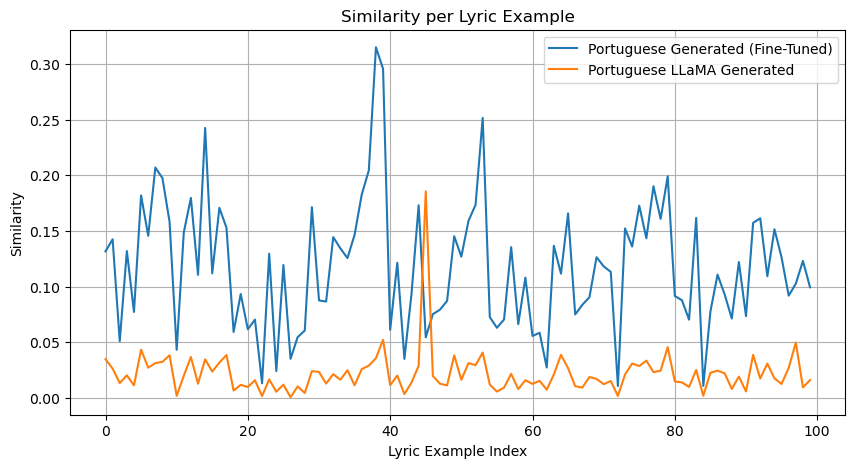

In [106]:
plt.figure(figsize=(10, 5))
plt.plot(similarity_pt_generated, label='Portuguese Generated (Fine-Tuned)')
plt.plot(similarity_pt_llama, label='Portuguese LLaMA Generated')
#plt.plot(similarity_en_fine_tuned, label='English Generated (Fine-Tuned)')
#plt.plot(similarity_en_llama, label='English LLaMA Generated')
plt.xlabel('Lyric Example Index')
plt.ylabel('Similarity')
plt.title('Similarity per Lyric Example')
plt.legend()
plt.grid(True)
plt.show()